In [1]:
import dill as pickle

In [62]:
import pickle as pkl

In [4]:
from nltk.translate.phrase_based import phrase_extraction

In [8]:
from nltk.translate import AlignedSent

In [14]:
import json
import os
import re
import string

from cltk.tokenize.word import WordTokenizer
from cltk.stem.lemma import LemmaReplacer
from nltk.translate import AlignedSent, Alignment, IBMModel1, IBMModel2
from nltk.tokenize import wordpunct_tokenize
from nltk.translate.ibm_model import AlignmentInfo

In [16]:
lat_tokenizer = WordTokenizer('latin')
eng_tokenizer = wordpunct_tokenize
lem = LemmaReplacer('latin')

In [2]:
with open('eng_ibm_model_2_1.pk', 'rb') as fin:
    emod = pickle.load(fin)

In [3]:
with open('lat_ibm_model_2_1.pk', 'rb') as fin:
    lmod = pickle.load(fin)

In [63]:
with open('../aligned_sentences/lat_ibm_model_2_bitext.pk', 'rb') as fin:
    lbitext = pkl.load(fin)

In [64]:
with open('../aligned_sentences/eng_ibm_model_2_bitext.pk', 'rb') as fin:
    ebitext = pkl.load(fin)

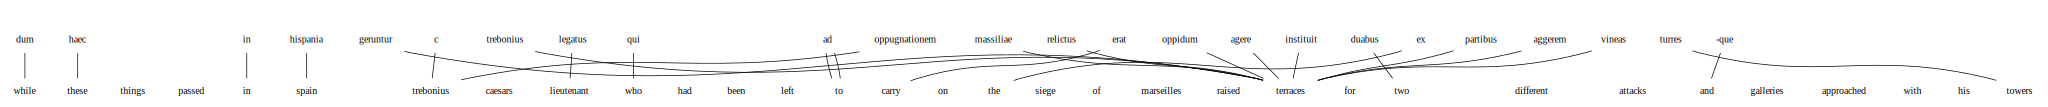

In [65]:
lbitext[0]

In [13]:
def tokenize_sentences(sent,tok):
    tokens = []
    if type(sent) == list:
        for s in sent:
            s = re.sub(r'[{}]'.format(string.punctuation),'',s).lower()
            s = re.sub(r'  *', ' ', s)
            tokens += tok(s.lower())
    else:
        sent = re.sub(r'[{}]'.format(string.punctuation),'',sent).lower()
        sent = re.sub(r'  *', ' ', sent)
        tokens += tok(sent)
        
    return tokens

In [6]:
s = "Eo adducta re per Isauriam rege Persarum bellis finitimis illigato repellenteque a collimitiis suis ferocissimas gentes quae mente quadam versabili hostiliter eum saepe incessunt et in nos arma moventem aliquotiens iuvant Nohodares quidam nomine e numero optimatum incursare Mesopotamiam quotiens copia dederit ordinatus explorabat nostra sollicite si repperisset usquam locum vi subita perrupturus."
t = "When affairs had reached this stage in Isauria the king of Persia involved in war with his neighbours was driving back from his frontiers a number of very wild tribes which with inconsistent policy often make hostile raids upon his territories and sometimes aid him when he makes war upon us.. One of his grandees Nohodares by name having received orders to invade Mesopotamia whenever occasion offered was carefully reconnoitring our territory intending a sudden incursion in case he found any opening."

In [17]:
lat_sent = tokenize_sentences(s,lat_tokenizer.tokenize)
#while '' in lat_sent:
#    lat_sent.remove('')
#lat_sent = lem.lemmatize(lat_sent)
eng_sent = tokenize_sentences(t, eng_tokenizer)

In [18]:
a = AlignedSent(lat_sent,eng_sent)

In [68]:
lbitext[0].words

['dum',
 'haec',
 'in',
 'hispania',
 'geruntur',
 'c',
 'trebonius',
 'legatus',
 'qui',
 'ad',
 'oppugnationem',
 'massiliae',
 'relictus',
 'erat',
 'duabus',
 'ex',
 'partibus',
 'aggerem',
 'vineas',
 'turres',
 '-que',
 'ad',
 'oppidum',
 'agere',
 'instituit']

In [20]:
lmod.best_model2_alignment(a)

In [21]:
ai = _

In [57]:
ali = zip(range(len(ai.alignment)),ai.alignment)

In [151]:
l = [1,3,4]
l.append(0)

In [ ]:
ebitext[0].mots.append('none')
ebitext[0].words.append('none')

In [185]:
ebitext[0]

TypeError: list indices must be integers or slices, not NoneType

AlignedSent(['while', 'these', 'things', 'passed', 'in', 'spain', 'trebonius', 'caesars', 'lieutenant', 'who', 'had', 'been', 'left', 'to', 'carry', 'on', 'the', 'siege', 'of', 'marseilles', 'raised', 'terraces', 'for', 'two', 'different', 'attacks', 'and', 'approached', 'with', 'his', 'towers', 'and', 'galleries', 'none'], ['dum', 'haec', 'in', 'hispania', 'geruntur', 'c', 'trebonius', 'legatus', 'qui', 'ad', 'oppugnationem', 'massiliae', 'relictus', 'erat', 'duabus', 'ex', 'partibus', 'aggerem', 'vineas', 'turres', '-que', 'ad', 'oppidum', 'agere', 'instituit', 'none', 'none'], Alignment([(0, 0), (1, 1), (2, 4), (3, 6), (4, 2), (5, 3), (6, 6), (7, 17), (8, 7), (9, 8), (10, 12), (11, 12), (12, 12), (13, 24), (14, 6), (15, 24), (16, 16), (17, 11), (18, None), (19, 11), (20, 6), (21, 18), (22, 10), (23, 14), (24, 6), (25, 17), (26, 20), (27, 17), (28, 19), (29, 24), (30, 19), (31, 20), (32, 11)]))

In [179]:
lens = [len(ebitext[0].words),len(ebitext[0].mots)]

In [186]:
lens

[34, 27]

In [187]:
for i,a in enumerate(ebitext[0].alignment):
    if None in a:
        tup = list(a)
        tup[a.index(None)] = lens[a.index(None)]-1
        print(tuple(tup))
        ebitext[0].alignment = Alignment(list(ebitext[0].alignment)[:i] + [tuple(tup)] + list(ebitext[0].alignment)[i+1:])

(18, 26)


In [213]:
' '.join(ebitext[b].words)

'in the mean time l nasidius sent by pompey to the assistance of domitius and the marseillians with a fleet of sixteen ships some of which were strengthened with beaks of brass passed the straits of sicily unknown to curio landed at messana and raised so great a terrorin the place that being abandoned by the senate and principal inhabitants he found means to carry off one of their gallies and joining it to his own fleets steered directly for marseilles having despatched a frigate before to apprize domitius and the inhabitants of his coming and press them to hazard a second engagement with brutus when they should be reinforced by his fleet none'

In [214]:
' '.join(ebitext[b].mots)

'interim l nasidius ab c -ne pompeio cum classe navium ivx in quibus paucae erant aeratae l domitio massiliensibus -que subsidio missus freto siciliae imprudente atque inopinante curione pervehitur adpulsis -que messanam navibus atque inde propter repentinum terrorem principum ac senatus fuga facta ex navalibus eorum navem deducit hac adiuncta ad reliquas naves cursum massiliam versus perficit praemissa -que clam navicula domitium massiliensis -que de suo adventu certiores facit eos -que magnopere hortatur ut rursus cum bruti classe additis suis auxiliis confligant none'

In [217]:
b = 11
if ebitext[b].mots[-1] != 'none':
    ebitext[b].mots.append('none')
    ebitext[b].words.append('none')
lens = [len(ebitext[b].words),len(ebitext[b].mots)]
for i,a in enumerate(ebitext[b].alignment):
    if None in a:
        tup = list(a)
        tup[a.index(None)] = lens[a.index(None)]-1
        ebitext[b].alignment = Alignment(list(ebitext[b].alignment)[:i] + [tuple(tup)] + list(ebitext[b].alignment)[i+1:])
p = phrase_extraction(' '.join(ebitext[b].words), ' '.join(ebitext[b].mots), ebitext[b].alignment)

In [218]:
p

{((0, 30),
  (1, 39),
  'the marseillians after their defeat had drawn as many old ships out of the docks as they had lost in the engagement and repaired and rigged them with wondrous expedition',
  'massilienses post superius incommodum veteres ad eundem numerum ex navalibus productas navis refecerant summa -que industria armaverant—remigum gubernatorum magna copia subpetebat— piscatorias -que adiecerant atque contexerant ut essent ab ictu telorum remiges tuti has sagittariis tormentis -que conpleverunt none'),
 ((0, 30),
  (1, 39),
  'the marseillians after their defeat had drawn as many old ships out of the docks as they had lost in the engagement and repaired and rigged them with wondrous expedition',
  'post superius incommodum veteres ad eundem numerum ex navalibus productas navis refecerant summa -que industria armaverant—remigum gubernatorum magna copia subpetebat— piscatorias -que adiecerant atque contexerant ut essent ab ictu telorum remiges tuti has sagittariis tormentis -qu

In [73]:
p.pop()

((0, 25),
 (0, 31),
 'dum haec in hispania geruntur c trebonius legatus qui ad oppugnationem massiliae relictus erat duabus ex partibus aggerem vineas turres -que ad oppidum agere instituit',
 'while these things passed in spain trebonius caesars lieutenant who had been left to carry on the siege of marseilles raised terraces for two different attacks and approached with his towers and galleries')

In [52]:
ali

In [56]:
list(ali)[1:]


[]

In [ ]:
emod.best_model2_alignment

In [28]:
ai.src_sentence

(None,
 'when',
 'affairs',
 'had',
 'reached',
 'this',
 'stage',
 'in',
 'isauria',
 'the',
 'king',
 'of',
 'persia',
 'involved',
 'in',
 'war',
 'with',
 'his',
 'neighbours',
 'was',
 'driving',
 'back',
 'from',
 'his',
 'frontiers',
 'a',
 'number',
 'of',
 'very',
 'wild',
 'tribes',
 'which',
 'with',
 'inconsistent',
 'policy',
 'often',
 'make',
 'hostile',
 'raids',
 'upon',
 'his',
 'territories',
 'and',
 'sometimes',
 'aid',
 'him',
 'when',
 'he',
 'makes',
 'war',
 'upon',
 'us',
 'one',
 'of',
 'his',
 'grandees',
 'nohodares',
 'by',
 'name',
 'having',
 'received',
 'orders',
 'to',
 'invade',
 'mesopotamia',
 'whenever',
 'occasion',
 'offered',
 'was',
 'carefully',
 'reconnoitring',
 'our',
 'territory',
 'intending',
 'a',
 'sudden',
 'incursion',
 'in',
 'case',
 'he',
 'found',
 'any',
 'opening')